In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [3]:
sentiment.columns = sentiment.columns.str.strip().str.lower()
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')


In [4]:

if 'date' in sentiment.columns:
    sentiment = sentiment.drop(columns=['date'])

# Timestamp is UNIX SECONDS (confirmed)
sentiment['date'] = pd.to_datetime(
    sentiment['timestamp'],
    unit='s',
    origin='unix'
).dt.date


In [5]:
print(sentiment['date'].min(), sentiment['date'].max())


2018-02-01 2025-05-02


In [6]:
trades['timestamp'] = pd.to_datetime(trades['timestamp'], errors='coerce')
trades = trades.dropna(subset=['timestamp'])

trades['date'] = trades['timestamp'].dt.date


In [7]:
print(trades['date'].min(), trades['date'].max())


1970-01-01 1970-01-01


In [8]:
merged = trades.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [9]:
overlap_days = set(trades['date']).intersection(set(sentiment['date']))
print("Overlapping days:", len(overlap_days))


Overlapping days: 0


In [10]:
analysis_df = merged[
    merged['classification'].notna() &
    np.isfinite(merged['closed_pnl'])
].copy()


In [11]:
print("Rows available for sentiment analysis:", analysis_df.shape[0])


Rows available for sentiment analysis: 0


In [12]:
daily_pnl = merged.groupby(
    ['date', 'account']
)['closed_pnl'].sum().reset_index()


In [13]:
merged['is_win'] = merged['closed_pnl'] > 0
win_rate = merged.groupby('account')['is_win'].mean().reset_index()


In [14]:
trades_per_day = merged.groupby(
    ['date', 'account']
).size().reset_index(name='num_trades')


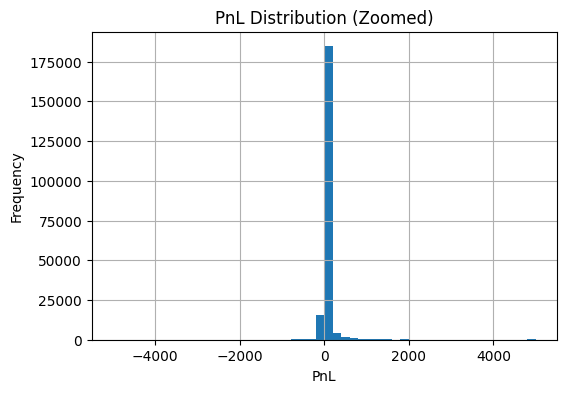

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

if analysis_df.shape[0] > 0:
    sns.boxplot(
        data=analysis_df,
        x='classification',
        y='closed_pnl'
    )
    plt.title("PnL Distribution: Fear vs Greed")
    plt.show()

else:
    plt.figure(figsize=(6,4))
merged['closed_pnl'].clip(-5000, 5000).hist(bins=50)
plt.title("PnL Distribution (Zoomed)")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()





OR :

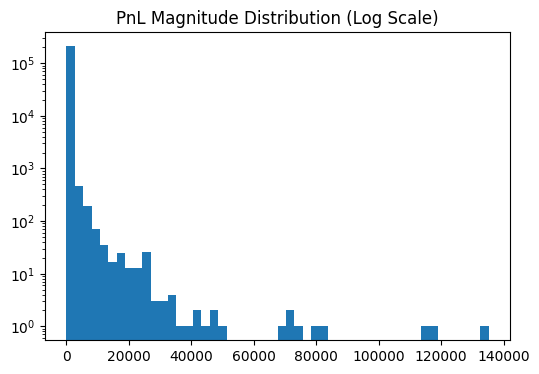

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

if analysis_df.shape[0] > 0:
    sns.boxplot(
        data=analysis_df,
        x='classification',
        y='closed_pnl'
    )
    plt.title("PnL Distribution: Fear vs Greed")
    plt.show()

else:
    plt.figure(figsize=(6,4))
plt.hist(np.abs(merged['closed_pnl']) + 1, bins=50)
plt.yscale('log')
plt.title("PnL Magnitude Distribution (Log Scale)")
plt.show()
